In [1]:
%matplotlib inline

# base
import h5py
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer 
from pandas_plink import read_plink
# viz 
import matplotlib.pyplot as plt 
import cartopy.crs as ccrs 
# feems 
from feems.utils import prepare_graph_inputs 
from feems import SpatialGraph, Viz 


In [2]:
data = h5py.File("/home/osboxes/ipyrad-23samples/no-outgroup_outfiles/no-outgroup.snps.hdf5")

raw_genotypes = np.apply_along_axis(np.sum, 2, data["genos"][:])

G = np.where(raw_genotypes <= 2 , raw_genotypes, np.nan*raw_genotypes)
print(G.shape)
imp = SimpleImputer(missing_values=np.nan, strategy="mean") 
genotypes = imp.fit_transform(np.array(G).T) 


(3045, 23)


In [3]:
#!wget https://raw.githubusercontent.com/radcamp/radcamp.github.io/master/Kigali2023/Cheetah.coords
!wget https://raw.githubusercontent.com/radcamp/radcamp.github.io/master/Kigali2023/Cheetah.outer

--2023-07-17 23:21:13--  https://raw.githubusercontent.com/radcamp/radcamp.github.io/master/Kigali2023/Cheetah.outer
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 868 [text/plain]
Saving to: ‘Cheetah.outer’

Cheetah.outer       100%[===================>]     868  --.-KB/s    in 0s      

2023-07-17 23:21:13 (85.8 MB/s) - ‘Cheetah.outer’ saved [868/868]



In [4]:
coord = np.loadtxt("./Cheetah.coords")
outer = np.loadtxt("./Cheetah.outer")
grid_path = "/home/osboxes/src/feems/feems/data/grid_250.shp"

In [5]:
# graph input files
outer, edges, grid, _ = prepare_graph_inputs(coord=coord, ggrid=grid_path, translated=False, buffer=0, outer=outer)

In [6]:
%%time
sp_graph = SpatialGraph(genotypes, coord, grid, edges, scale_snps=False)

CPU times: user 1min 25s, sys: 938 ms, total: 1min 26s
Wall time: 1min 26s


In [ ]:
projection = ccrs.EquidistantConic(central_longitude=23, central_latitude=8) 
fig = plt.figure(dpi=300) 
ax = fig.add_subplot(1, 1, 1, projection=projection) 
v = Viz(ax, sp_graph, projection=projection, edge_width=.5, 
    edge_alpha=1, edge_zorder=100, sample_pt_size=10, 
    obs_node_size=7.5, sample_pt_color="black", 
    cbar_font_size=10) 
v.draw_map() 
v.draw_samples() 
v.draw_edges(use_weights=False) 
v.draw_obs_nodes(use_ids=False) 

/home/osboxes/miniconda3/envs/feems/lib/python3.8/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/osboxes/miniconda3/envs/feems/lib/python3.8/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/osboxes/miniconda3/envs/feems/lib/python3.8/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/home/osboxes/miniconda3/envs/feem

In [9]:
%%time 
sp_graph.fit(lamb = 20.0) 

constant-w/variance fit, converged in 156 iterations, train_loss=-29699.8316689
lambda=20.0000000, alpha=0.0377315, converged in 120 iterations, train_loss=-29872.2427900
CPU times: user 1.97 s, sys: 3.48 s, total: 5.45 s
Wall time: 1.37 s


/home/osboxes/miniconda3/envs/feems/lib/python3.8/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/osboxes/miniconda3/envs/feems/lib/python3.8/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/osboxes/miniconda3/envs/feems/lib/python3.8/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


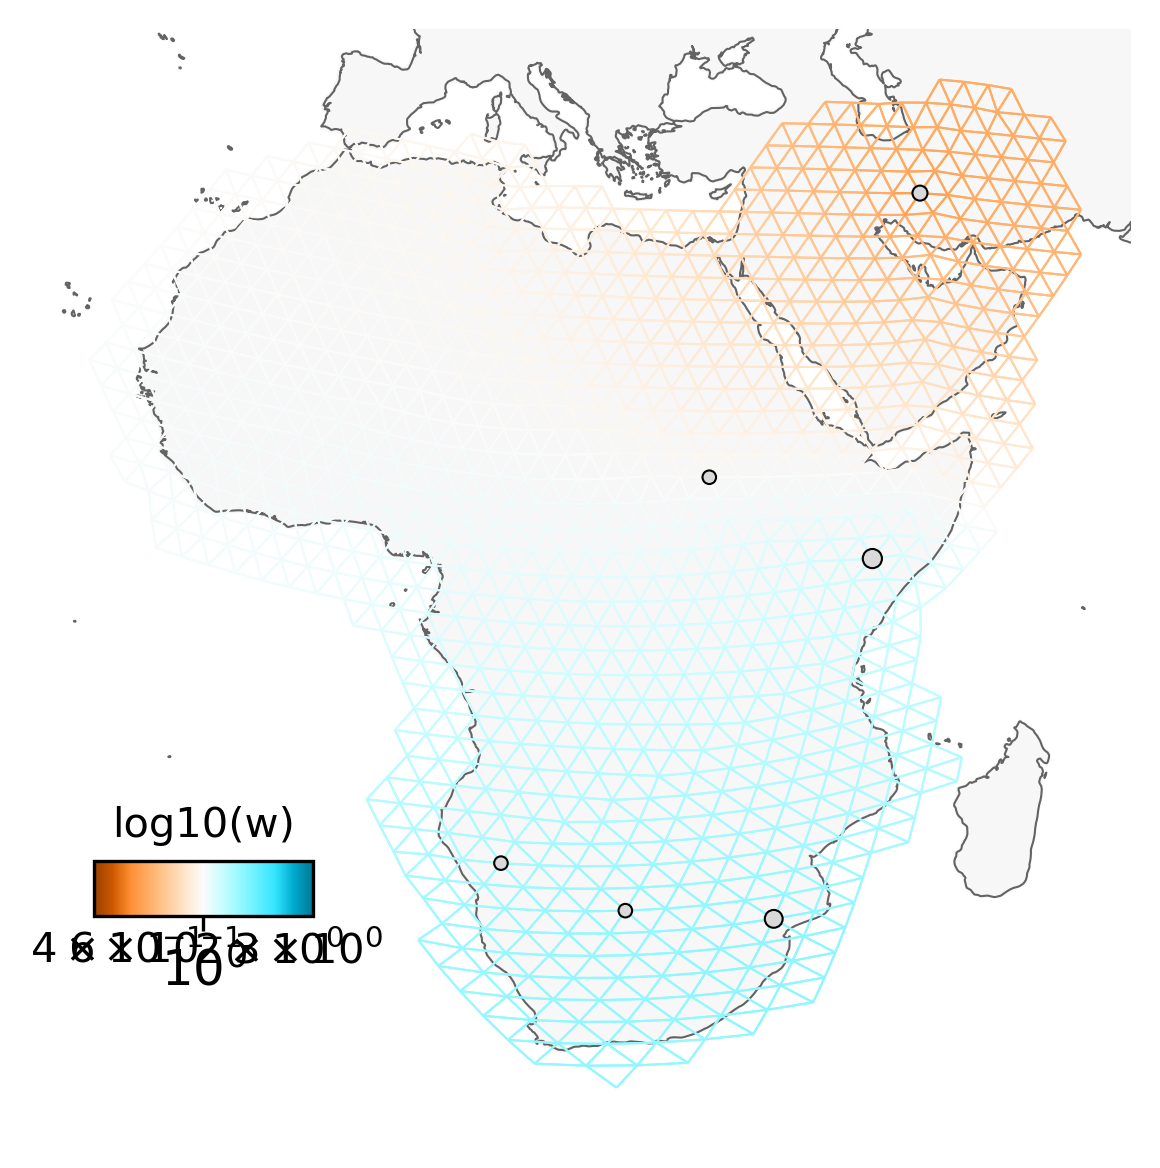

In [10]:

fig = plt.figure(dpi=300) 

ax = fig.add_subplot(1, 1, 1, projection=projection) 
v = Viz(ax, sp_graph, projection=projection, edge_width=0.5, 
    edge_alpha=1, edge_zorder=100, sample_pt_size=20, 
    obs_node_size=7.5, sample_pt_color="black", 
    cbar_font_size=10, abs_max=0.5) 
v.draw_map() 
v.draw_edges(use_weights=True) 
v.draw_obs_nodes(use_ids=False) 
v.draw_edge_colorbar() 


In [24]:
locus = 11
print(G[locus])
genotypes[:, locus]

[nan  1. nan  1.  2. nan nan  0.  0. nan nan nan nan nan nan nan nan  1.
 nan  0. nan nan  2.]


array([0.875, 1.   , 0.875, 1.   , 2.   , 0.875, 0.875, 0.   , 0.   ,
       0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 1.   ,
       0.875, 0.   , 0.875, 0.875, 2.   ])

In [31]:
locus = 11
names = data["snps"].attrs["names"]
pd.DataFrame([G[locus], genotypes[:, locus]], columns=names, index=["pre-imputation", "post-imputation"]).T

,pre-imputation,post-imputation
SRR19760910,NaN,0.875
SRR19760912,1.0,1.000
SRR19760918,NaN,0.875
SRR19760920,1.0,1.000
SRR19760921,2.0,2.000
SRR19760924,NaN,0.875
SRR19760927,NaN,0.875
SRR19760928,0.0,0.000
SRR19760942,0.0,0.000
SRR19760946,NaN,0.875
